In [1]:
from IPython.display import Image

## TO DO: 25.02.27 - 머신러닝 모델 평가 방식 (다중 분류, Multiclass Classification)

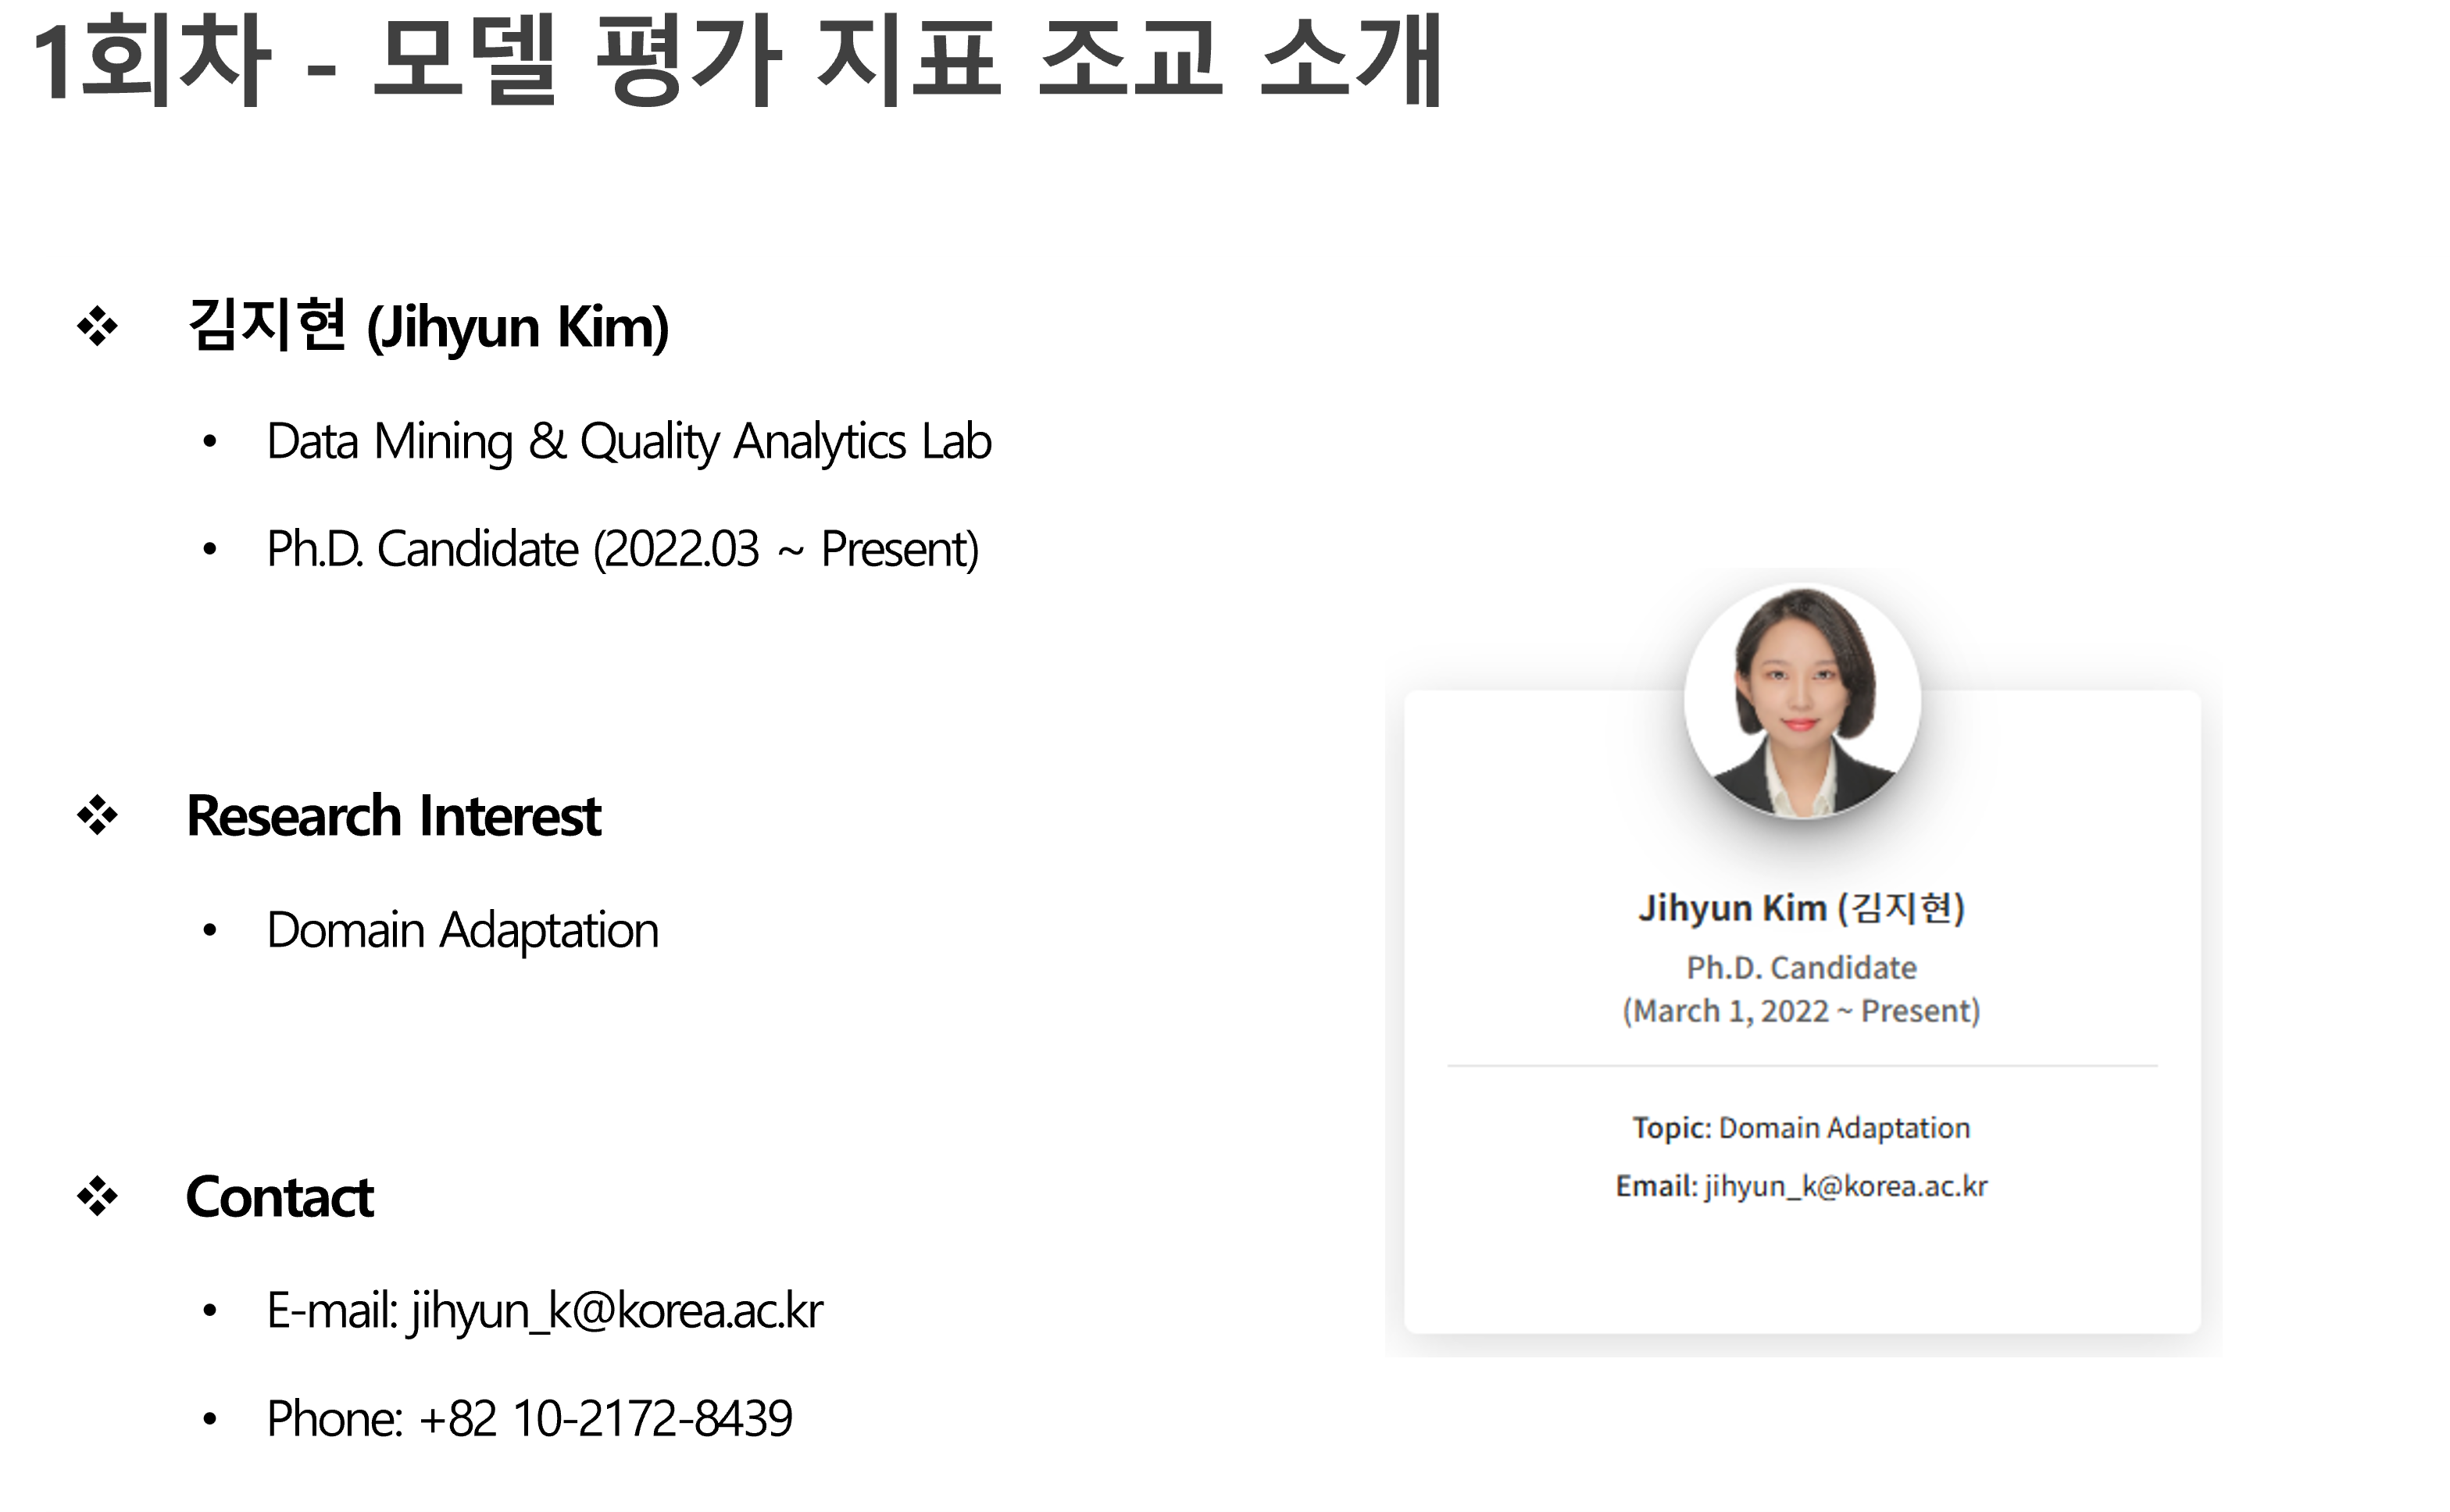

In [2]:
Image('./images/jihyun.png')

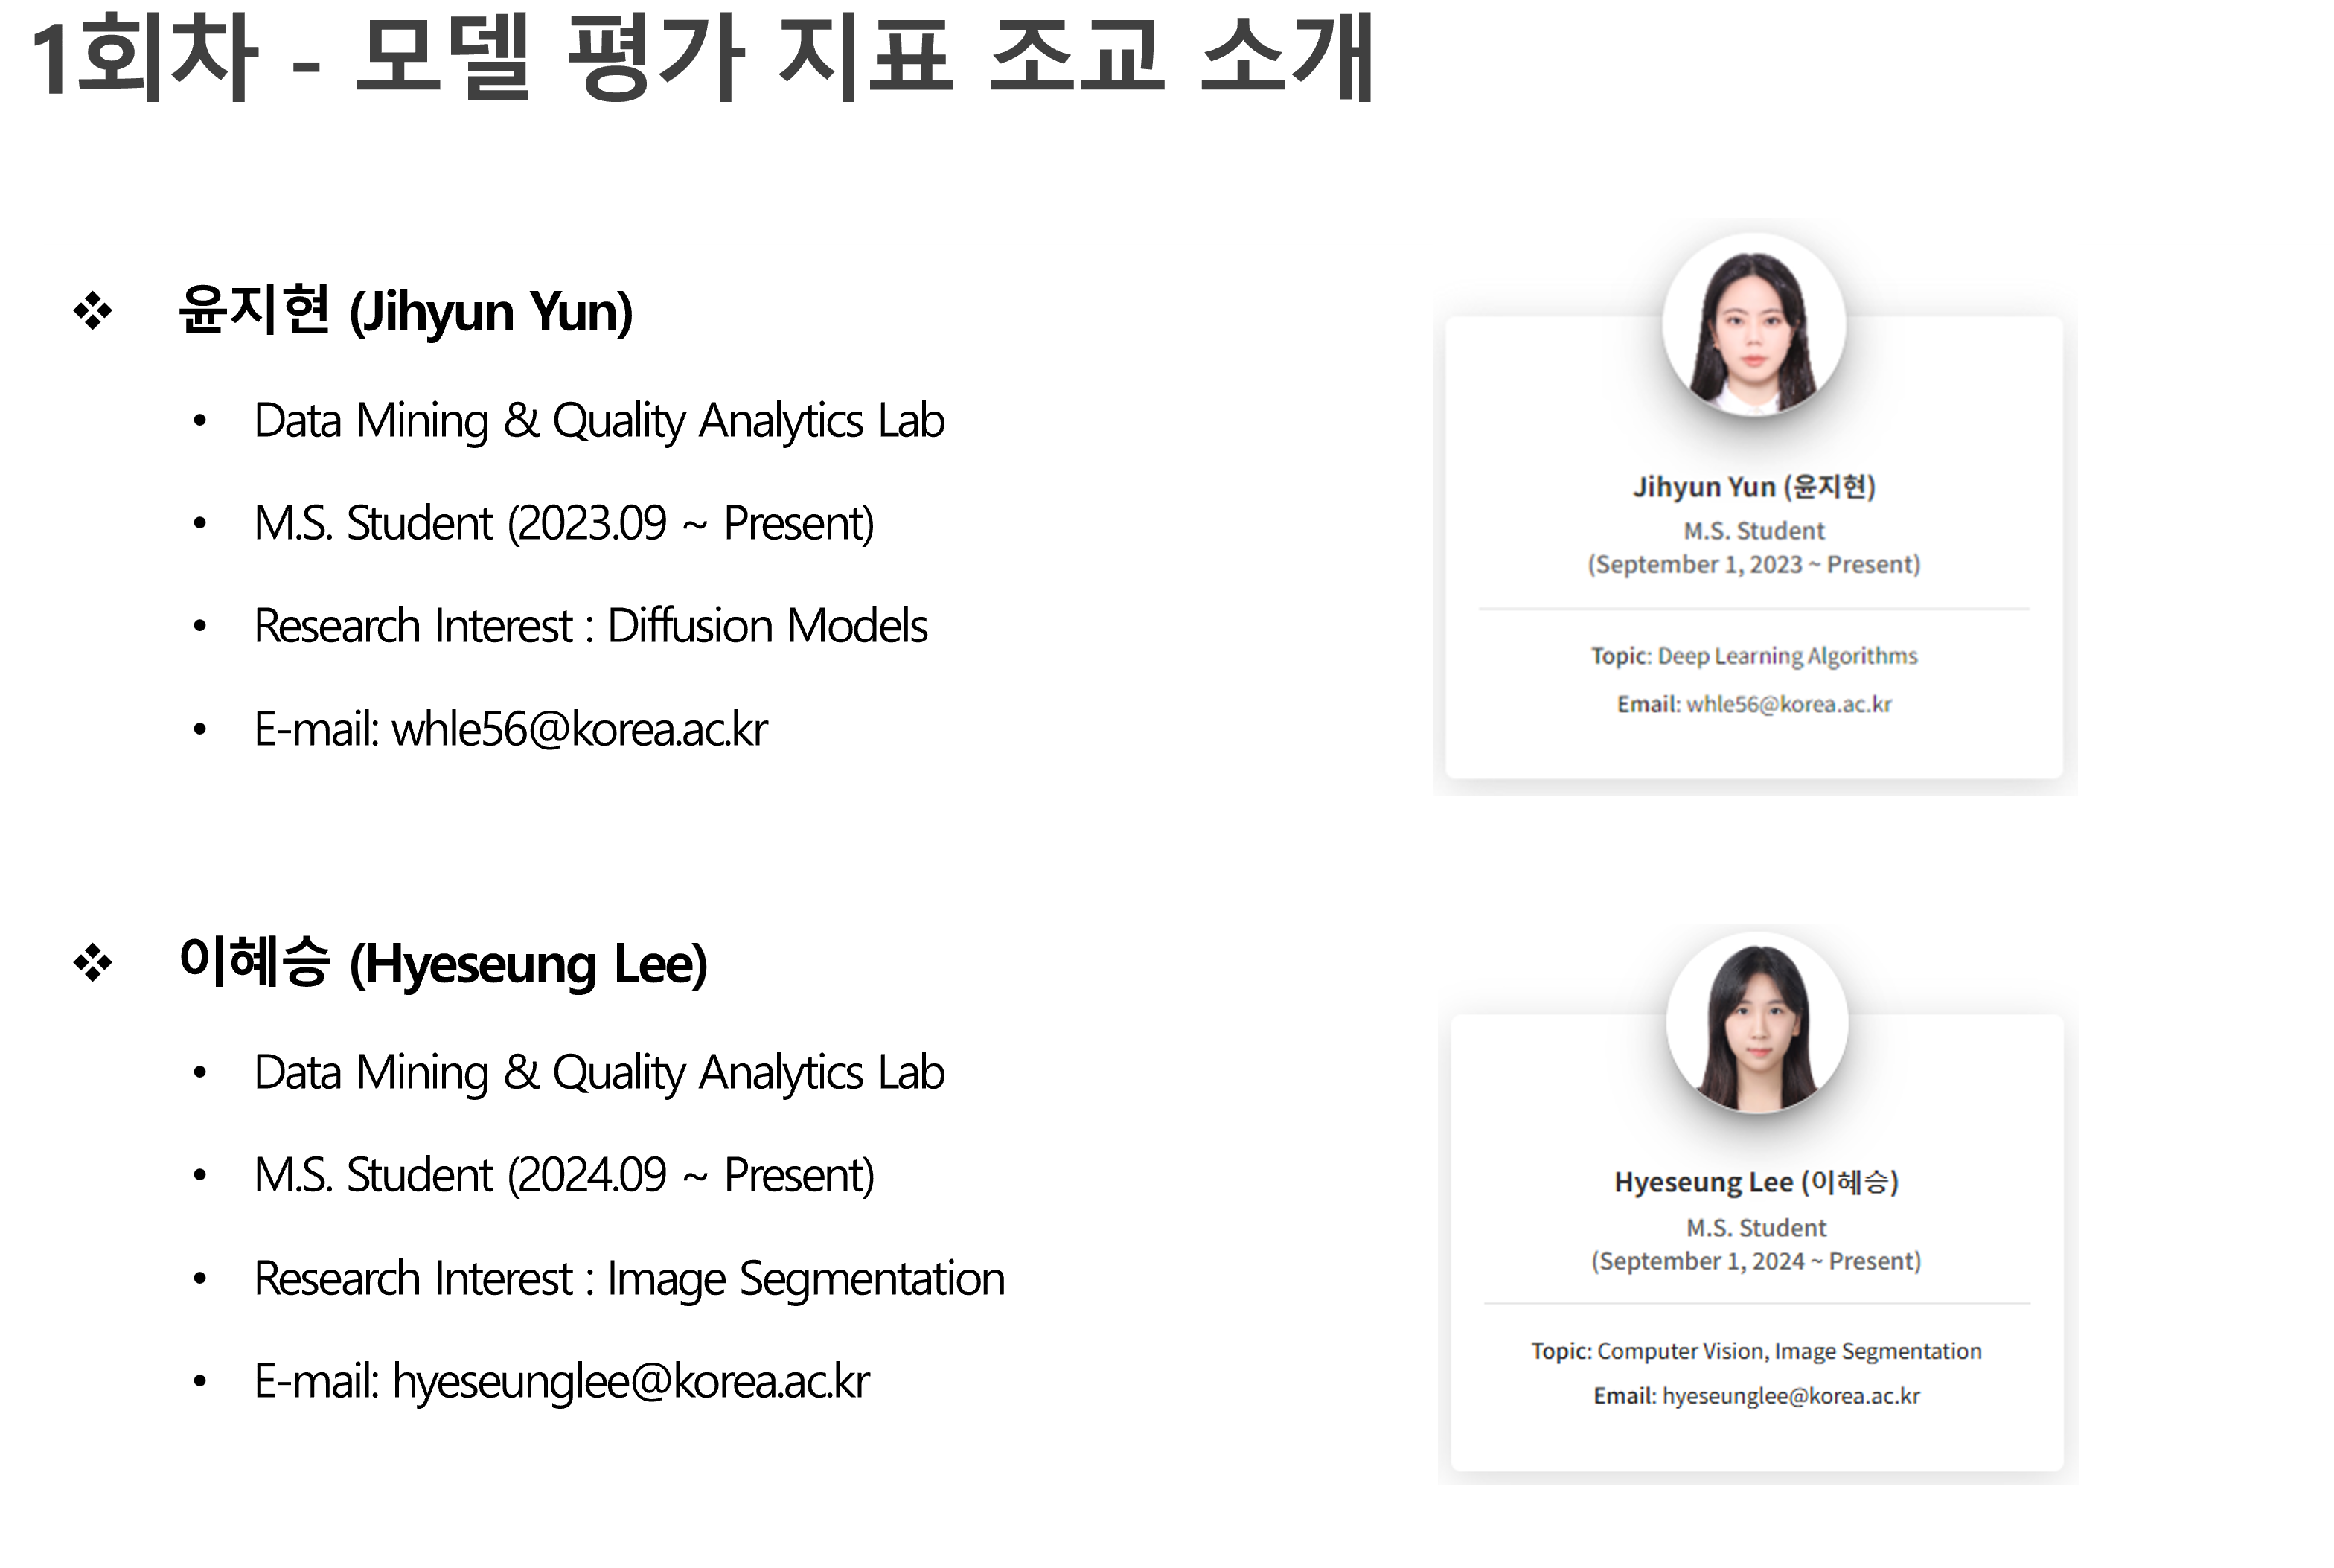

In [3]:
Image('./images/assistant.png')

### 0.  라이브러리 호출

In [1]:
# 모듈 불러오기

'''data handling'''
import numpy as np
import pandas as pd

'''visualization'''
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image  # for showing image file

'''warning handling'''
import warnings
warnings.filterwarnings(action='ignore')

### 1. 데이터 불러오기: MNIST Digit Classification (MNIST 손글씨 숫자 데이터셋)
- MNIST가 원조 벤치마크를 제공하나, `scikit-learn`에서 8 by 8 image를 제공

__데이터 구조__
* 관측치 개수: 1797개
* 변수 개수: 64개 특성 (8x8)

**입력 변수(원인: 예측값을 설명할 수 있는 변수) -> "X"**   
- 8 by 8 해상도의 이미지 데이터셋!

**출력 변수(결과: 예측하고자 하는 값, 모델 출력 값) -> "Y"**
- class: 0~9 까지 손 글씨로 쓴 숫자를 분류하는 데이터셋

In [6]:
# 데이터 불러오기
from sklearn.datasets import load_digits

dataset = load_digits()
print(dataset)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [7]:
dataset['data'].shape

(1797, 64)

- 분류 문제에서 출력 값은 이산적인 형태
- 입력 데이터를 기반으로 '병이 없다'/'병이 있다' 를 예측(분류)하는 모델이라면, 두 가지 classes는 각각 0과 1로 정의됨

In [8]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
"""데이터 확인"""
print(f'데이터 정보: {dataset.keys()} \n')
print("데이터 형태 : ", dataset['data'].shape, '\n')
print("사용 변수 : ", dataset['feature_names'], '\n')
print("출력 변수 : ", dataset['target_names'], '\n')

데이터 정보: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']) 

데이터 형태 :  (1797, 64) 

사용 변수 :  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'] 

출력 변수 :  [0 1 2 3 4 5 6 7 8 9] 


**해당 데이터셋은 입력 변수가 픽셀로 되어있음**
- 이미지 데이터셋 분류 문제

**분류해야 하는 대상(class/출력변수)이 10개인 다중 classes 분류 문제**
- 손글씨 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9 총 10개 classes를 분류

### 2. 데이터 EDA 및 전처리

In [11]:
# 데이터 살펴보기

X, y = dataset['data'], dataset['target']
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

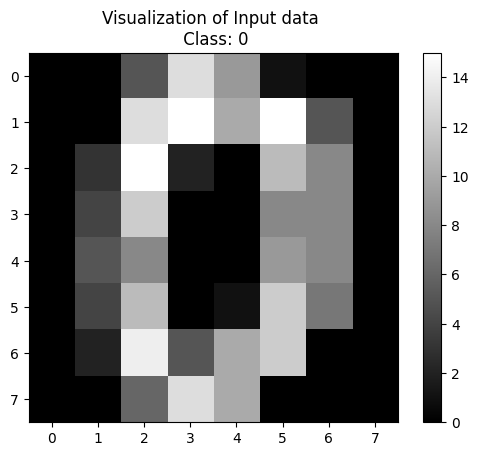

In [ ]:
# convert array to image using matplotlib
plt.imshow(X[0].reshape(8,8), cmap='grey')
plt.colorbar()
plt.title(f"Visualization of Input data \n Class: {y[0]}")
plt.show()

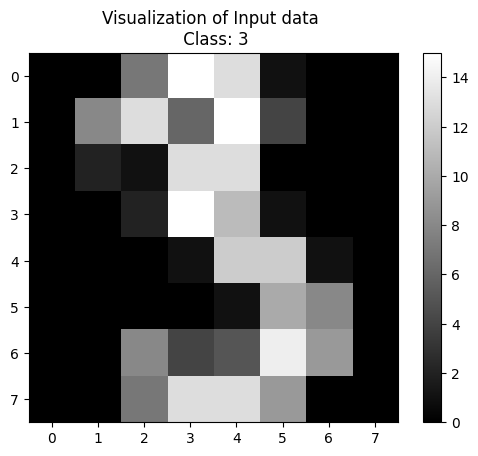

In [19]:
plt.imshow(X[3].reshape(8,8), cmap='grey')
plt.colorbar()
plt.title(f"Visualization of Input data \n Class: {y[3]}")
plt.show()

In [28]:
# X 범위 살펴보기

print(f"X 데이터 범위: [{np.min(X)} - {np.max(X)}]")

X 데이터 범위: [0.0 - 16.0]


##### Note
- 현재 데이터셋은 채널이 한 개 뿐인 grey scale 이미지! (color image는 R, G, B 3개 채널을 가짐)
- 일반적으로 이미지 데이터는 픽셀 값이 0~255 범위를 가지므로, 이를 정규화하여 학습 안정성을 도모함
    - 픽셀 값의 범위가 0~255로 크면 학습 속도가 느려지거나 파라미터 최적화에 어려움을 겪음
    - 사전 훈련된 이미지 모델 (e.g., ResNet)은 특정 정규화 방식을 요구하는 경우가 많음
    - 정규화를 통해 입력 데이터 분포를 균일하게 만들어 특정 채널(RGB) 또는 특정 이미지가 너무 크거나 작게 영향을 미치는 것을 방지 가능
    - CNN and ViT는 MinMax, ResNet and VGG 등 사전 훈련 모델은 Standard, GAN 등의 모델은 [-1,1] 변환
- MNIST 데이터셋은 흑백 이미지 (grey-scale), 즉 하나의 채널밖에 없으므로 채널 별 정규화 등이 필요 없음
    - 원본 MNIST 데이터셋은 해상도가 28x28로, 픽셀 범위가 0~255 (8-bit greyscale)
    - sklearn 데이텃셋은 해상도가 8x8로, 픽셀 범위가 0~16 (4-bit greyscale)

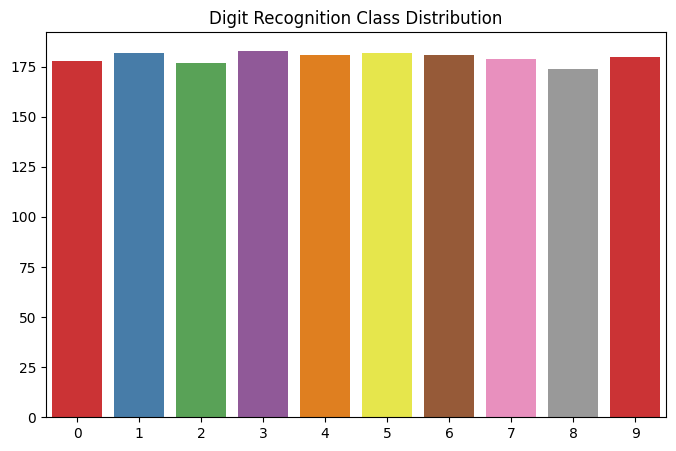

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))


In [39]:
# class 분포 확인

## 1. 시각적으로 확인
plt.figure(figsize=(8,5))
sns.barplot(x=np.unique(dataset['target'], return_counts=True)[0],
            y=np.unique(dataset['target'], return_counts=True)[1], palette='Set1')
plt.title("Digit Recognition Class Distribution")
plt.show()

## 2. 실제 값 확인
print(np.unique(dataset['target'], return_counts=True))   # 카테고리 형 값이 담긴 변수의 경우, 해당 변수 내에서 각 카테고리 값이 몇 개나 들어있는지 count해주는 메서드

#### Insights from class distribution
- 10개 classes에 대해서 샘플이 균형있게 수집된 것을 확인 가능 (불균형 없음)

#### 데이터 전처리

- Train, Test set 나누는 과정이 선행되어야 함

In [40]:
# 데이터 분할: train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, # 분할할 데이터 입력
                                                    test_size=0.2, # test size: float, 전체 20%를 test 80%를 train으로 활용
                                                    random_state=0) # 데이터 랜덤 분할. 랜덤성 제어를 위해서 임의 값으로 고정

print(f'학습 데이터 형태:   {X_train.shape}')
print(f'테스트 데이터 형태: {X_test.shape}')

학습 데이터 형태:   (1437, 64)
테스트 데이터 형태: (360, 64)


### 3. 모델 정의

`뉴럴 네트워크 모델 (Neural Network)`
- `sklearn`에서 제공하는 MLPClasifier 이용

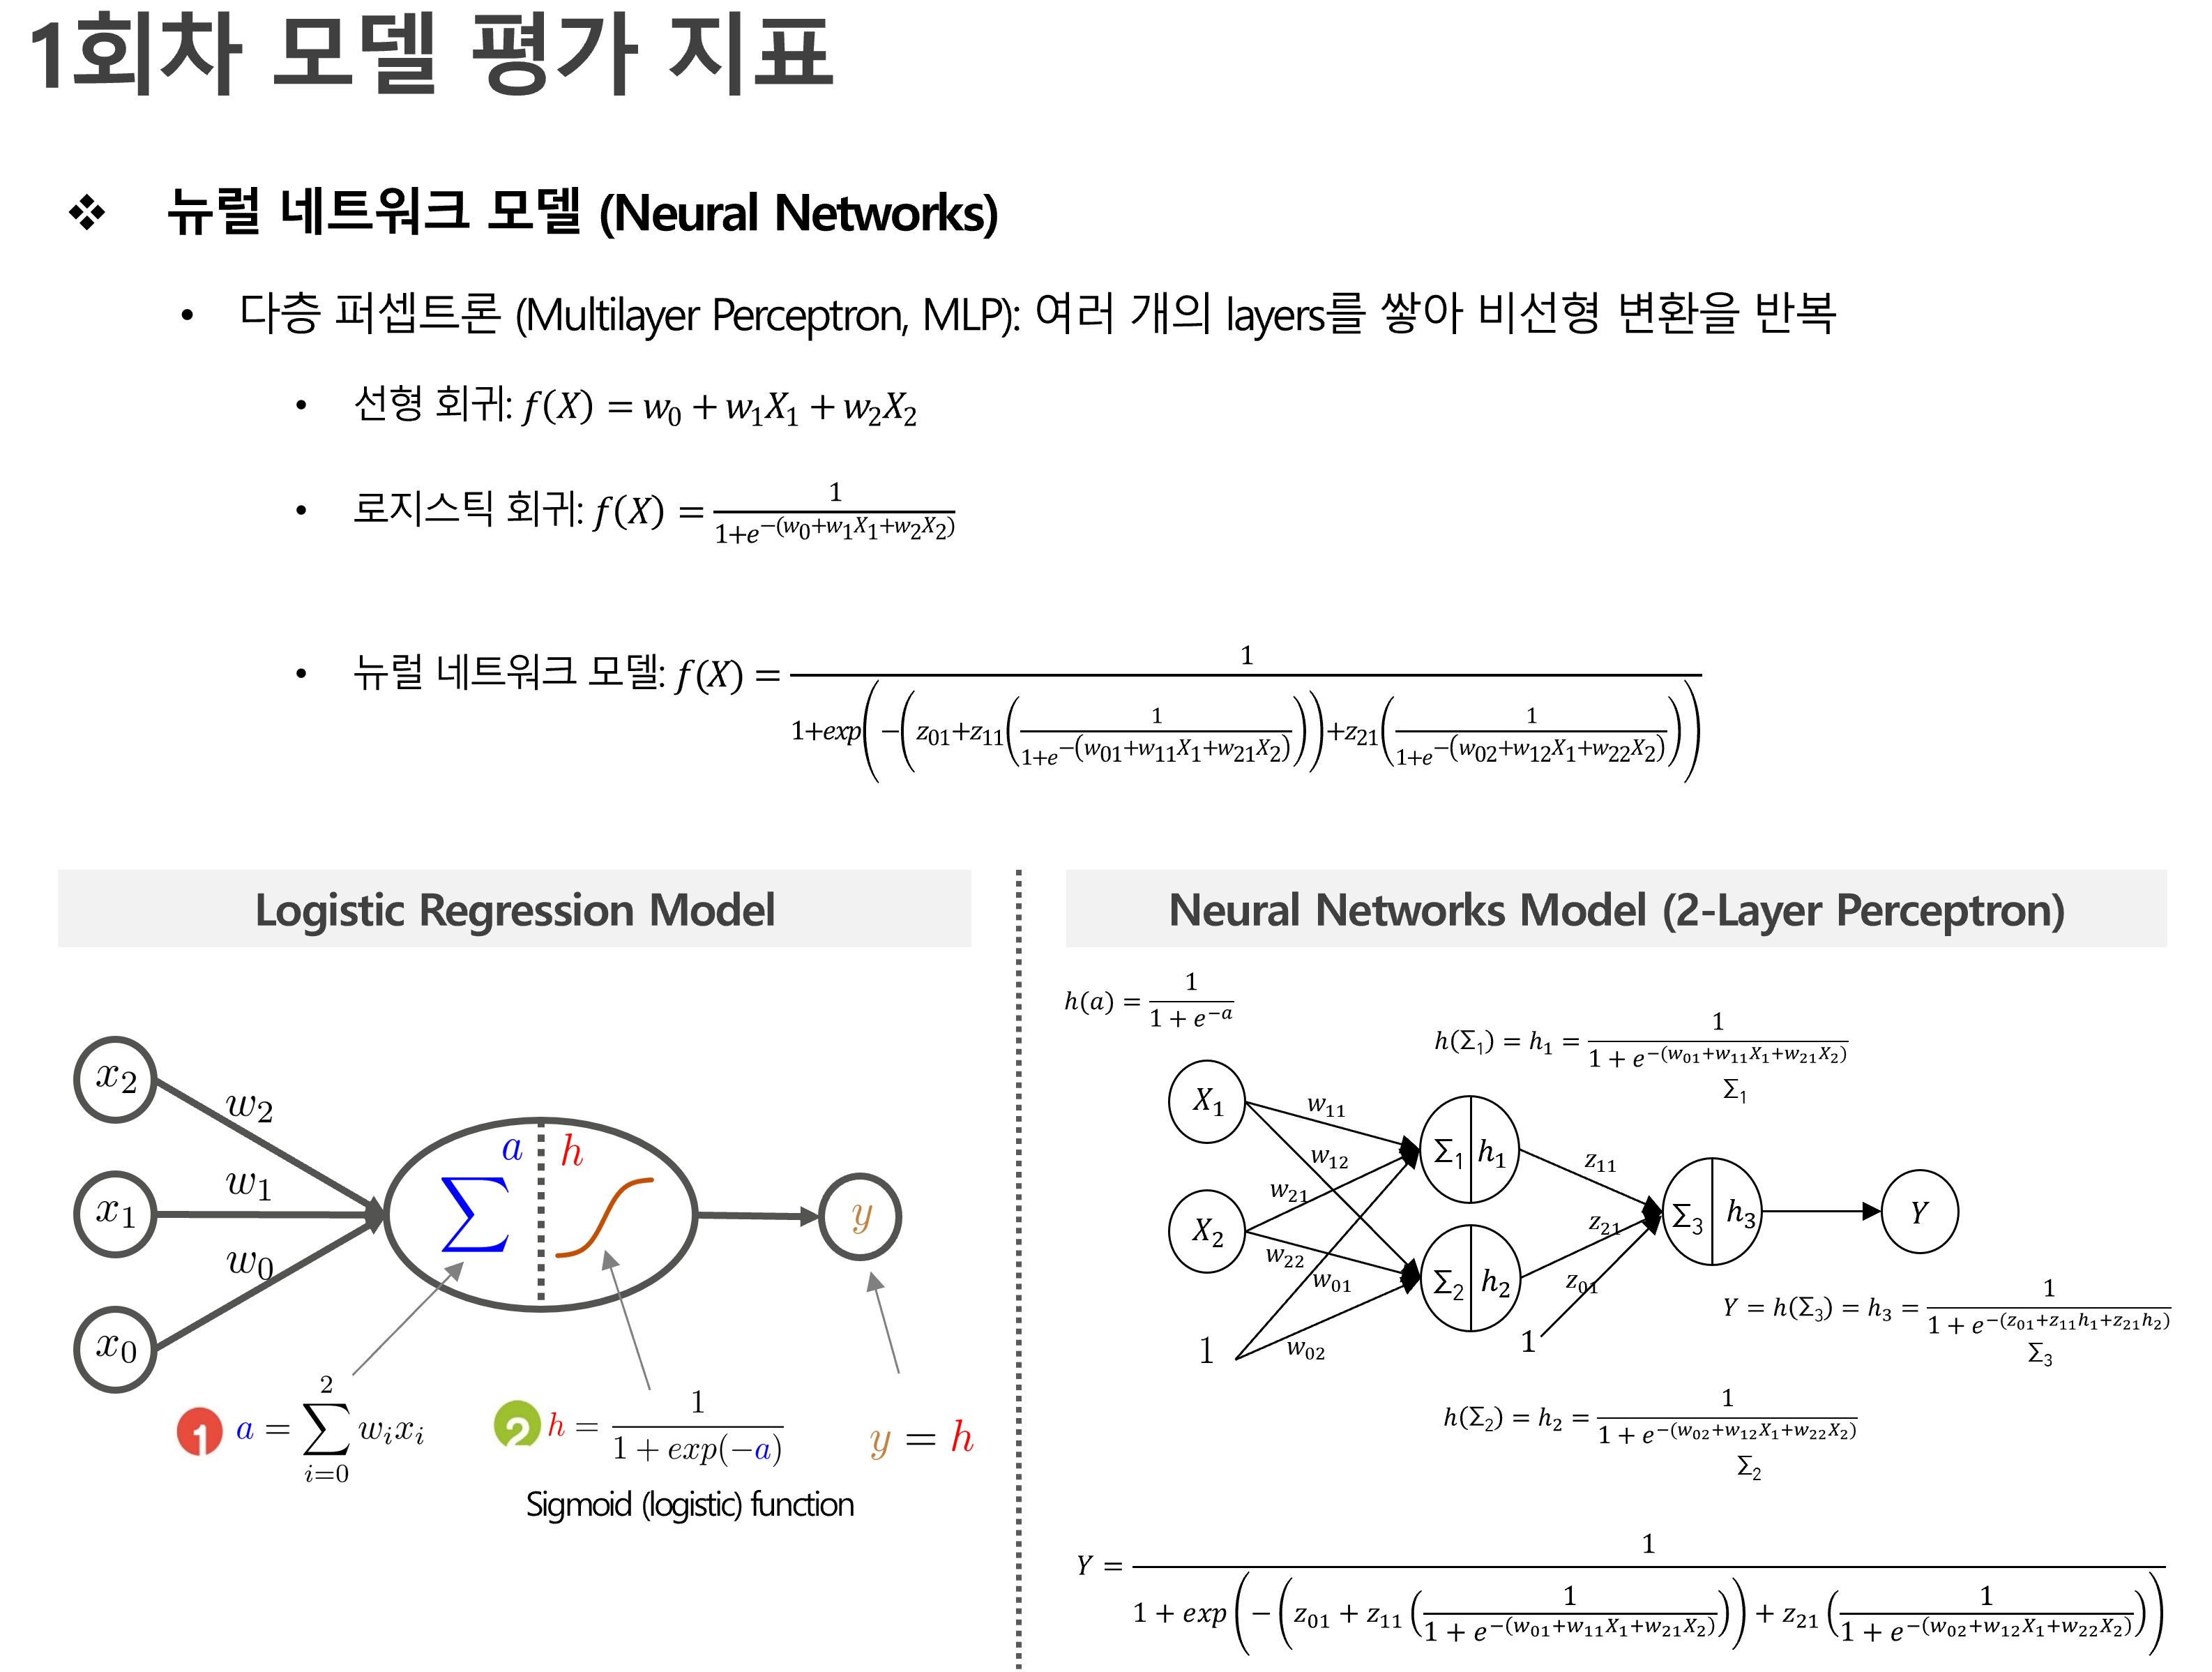

In [4]:
Image('./images/NNs.png')

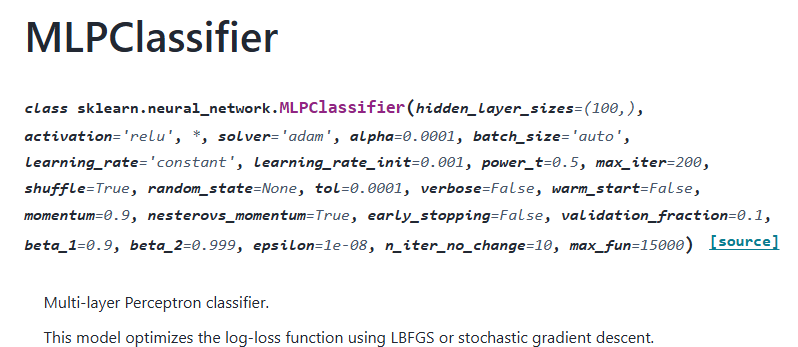

In [44]:
Image('./images/mlp-sk.png')

- `sklearn`에서 제공하는 MLPClassifier는 여러 인자를 입력으로 받음
- [참고 사이트](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

1. `hidden_layer_sizes` : (첫 번째 layer 노드 수, 두 번째 layer 노드 수, ..., $i$ 번째 layer 노드 수)
2. `activation` : 비선형 변환을 수행해 줄 활성화 함수 (e.g., sigmoide)
3. `solver` : 파라미터를 최적화 하기 위해 이용할 최적화 알고리즘
4. `alpha` : 파라미터 최적화 시 학습을 진행하는 속도를 결정
5. `batch_size` : MLP는 한 번에 데이터를 입력으로 받는 대신, 일정 데이터 chunk를 잘라 부분 학습
6. `learning_rate`: 파라미터 업데이트 시 alpha 값이 일정하게 유지될 지 (constant), 특정 시점 기준으로 점점 내려갈 지 (invscaling), 학습 수준을 보고 동적으로 조절할 지 (adaptive)를 결정
7. `max_iter` : 파라미터 업데이트를 얼마나 반복할 지 결정
8. `early_stopping`: 학습 데이터에 과적합 되지 않도록 조기 종료 여부 (True, False)
9. `validation_fraction`: 학습 데이터에서 일부를 떼어 test 성능을 근사할 수 있는 검증용 데이터로 활용. 몇 %의 학습 데이터를 검증용으로 활용할 지를 결정

-> 10회차에서 MLP를 비롯한 여러 딥러닝 모델과 학습 방식에 대해 구체적으로 배울 예정!

In [52]:
from sklearn.neural_network import MLPClassifier

# 모델 생성
mlp = MLPClassifier(hidden_layer_sizes=(8, 4),  # 2개 layers, 첫 번째 layer 노드 수 8, 두 번째 4개
                    random_state=42,
                    max_iter=10000)

### 4. 모델 학습 (Train set)
- 일반적으로 `sklearn` 등에서 제공하는 머신러닝 모델은 `fit()` 메서드를 통해서 모델 학습 가능 (최적 파라미터 자동 탐색)
    - 딥러닝 모델은 사용자가 직접 학습 가능하게끔 훈련 코드를 별도로 작성해야 함

In [53]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=10000, random_state=42)

### 5. 모델 적용 (Test set)
- 모델 훈련 과정에서 사용하지 않았던 새로운 데이터를 이용해 예측 수행
- 모의고사를 통해 훈련한 모델이 수능을 보는 것

In [54]:
y_pred = mlp.predict(X_test)

In [55]:
pred_info = pd.concat([pd.DataFrame(y_test), 
                       pd.DataFrame(y_pred)], axis=1)
pred_info.columns = ['y_true', 'y_pred']
pred_info.head(10)

,y_true,y_pred
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6
5,7,7
6,1,1
7,9,9
8,8,8
9,5,5


### 6. 다중 분류 모델 성능 평가

#### 다중 분류에서의 TP, TN, FP, FN 정의
- 다중 분류에서는 특정 하나의 class를 "Positive"로 보고, 나머지 모든 class를 "Negative"로 간주하는 방식 (One-vs-Rest, OVR)으로 성능 평가 가능
- 즉, 각 class 별로 TP, TN, FP, FN을 따로 계산

| 지표 |	이진 분류	| 다중 분류 |
| --- | ---- | ---- |
|TP (True Positive)     | 실제 Positive → 예측도 Positive      | 특정 클래스가 실제이면서 맞게 예측됨
|TN (True Negative)	    | 실제 Negative → 예측도 Negative		| 특정 클래스가 아닌 경우, 올바르게 예측됨
|FP (False Positive)	| 실제 Negative → 예측을 Positive         | 특정 클래스가 아닌데, 잘못 예측됨
|FN (False Negative)	| 실제 Positive → 예측을 Negative	    | 특정 클래스인데, 다른 클래스로 예측됨

**예시: 3개 classes (0, 1, 2)가 있을 때**
|Actual \ Pred |	0 |	1 |	2 |
| -- | -- | -- | -- |
|0 (실제 0)	|50 (TP)	|5  (FN)	|2  (FN)|
|1 (실제 1)	|3  (FN)	| 40 (TP)	|7  (FN)|
|2 (실제 2)	|1  (FN)	| 4  (FP)	|45 (TP)|

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix 생성
true, pred = pred_info['y_true'], pred_info['y_pred']
cm = confusion_matrix(y_true=true, y_pred=pred)
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 29  1  0  0  0  0  0  5  0]
 [ 0  2 33  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 1  0  0  0 29  0  0  0  0  0]
 [ 0  0  1  0  0 34  0  2  2  1]
 [ 0  1  0  0  0  1 42  0  0  0]
 [ 2  0  1  0  0  1  0 34  0  1]
 [ 0  3  0  0  0  0  0  0 35  1]
 [ 0  0  0  2  0  1  0  1  1 36]]


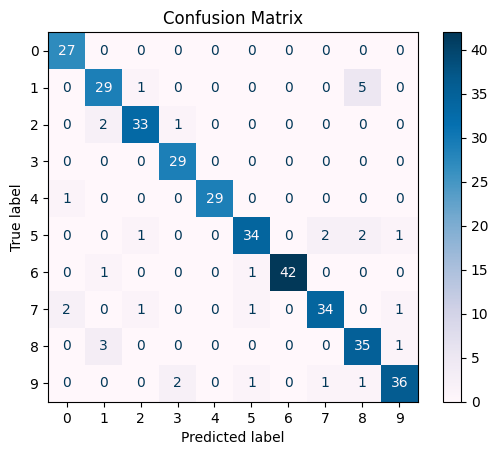

In [59]:
# confusion matrix 시각화 방식 - 1
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(cmap='PuBu')
plt.title("Confusion Matrix")
plt.show();

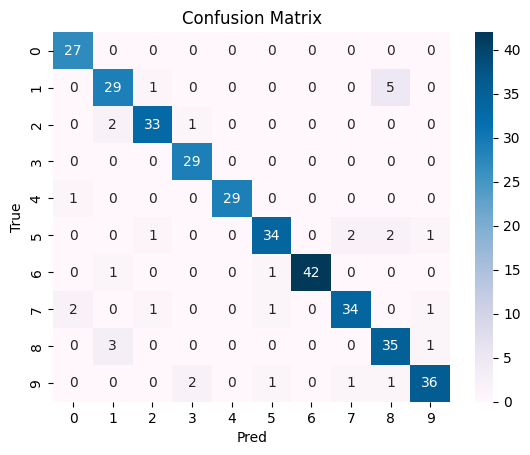

In [60]:
# confusion matrix 시각화 방식 - 2
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.xlabel("Pred")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### 다중 분류 문제에서 Confusion Matrix
- 대각 성분은 올바르게 예측된 샘플 개수
- 대각선 값이 많을 수록 좋은 모델
- 만일 비대각선 성분이 더 많다면? -> 오분류 패턴 분석 등의 추가적인 개선 작업 필요

#### 6-2. **정량적인 지표를 이용**하여서 객관적으로 평가해보자!
- 다중 분류 문제에서는 Class 별 Accuracy, Precision, Recall, F1-Score 등을 계산하여 더욱 자세한 성능 분석 가능

In [98]:
from sklearn.metrics import accuracy_score

true, pred = pred_info['y_true'], pred_info['y_pred']
acc = accuracy_score(true, pred)

print(f"Accuracy: {100*acc:.0f}%", f"Misclassification Error Rate: {100*(1-acc):.0f}%", sep='\n')

Accuracy: 91%
Misclassification Error Rate: 9%


In [89]:
# class 별 accuracy & misclassification error rate 계산

class_wise_accuracy = np.diag(cm) / np.sum(cm, axis=1)
misclassification_rates = 1 - np.diag(cm) / (np.sum(cm, axis=1)+1e-9)  # 0으로 나누는 것 방지

for i, acc in enumerate(class_wise_accuracy):
    print(f"Class {i} Accuracy: {100*acc:.0f}%")

Class 0 Accuracy: 100%
Class 1 Accuracy: 83%
Class 2 Accuracy: 92%
Class 3 Accuracy: 100%
Class 4 Accuracy: 97%
Class 5 Accuracy: 85%
Class 6 Accuracy: 95%
Class 7 Accuracy: 87%
Class 8 Accuracy: 90%
Class 9 Accuracy: 88%


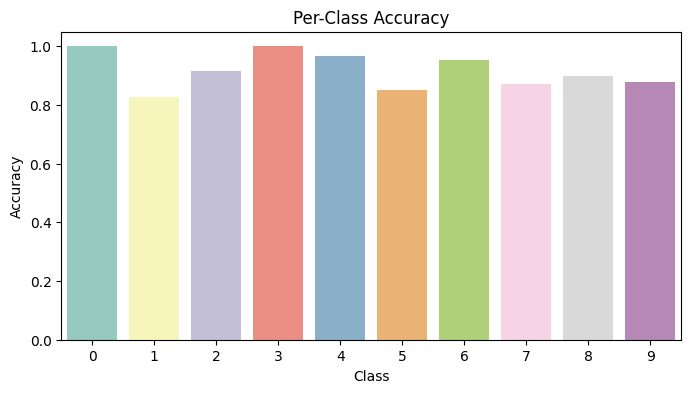

In [ ]:
# 시각화 - Class 별 정확도
plt.figure(figsize=(8, 4))
sns.barplot(x=np.arange(len(class_wise_accuracy)), y=class_wise_accuracy, palette="Set3")
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.show()

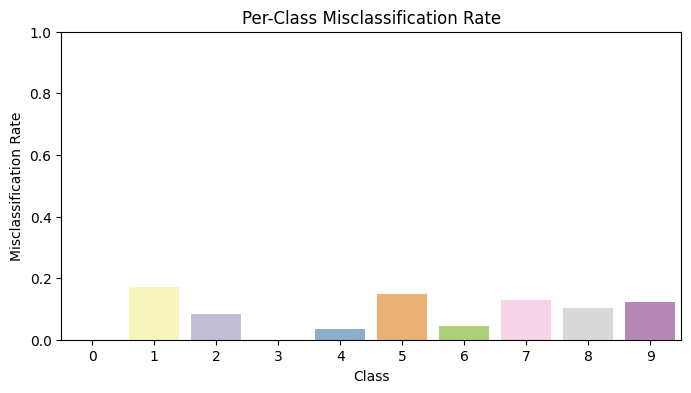

In [ ]:
# 시각화 - Class 별 오분류율
plt.figure(figsize=(8, 4))
sns.barplot(x=np.arange(len(misclassification_rates)), y=misclassification_rates, palette="Set3")
plt.xlabel("Class")
plt.ylabel("Misclassification Rate")
plt.title("Per-Class Misclassification Rate")
plt.ylim(0,1)  # y축 스케일을 0-1로 설정
plt.show()

In [ ]:
from sklearn.metrics import classification_report, f1_score

In [ ]:
print(classification_report(true, pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       0.83      0.83      0.83        35
           2       0.92      0.92      0.92        36
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        30
           5       0.92      0.85      0.88        40
           6       1.00      0.95      0.98        44
           7       0.92      0.87      0.89        39
           8       0.81      0.90      0.85        39
           9       0.92      0.88      0.90        41

    accuracy                           0.91       360
   macro avg       0.91      0.92      0.91       360
weighted avg       0.91      0.91      0.91       360



#### Remind
- Precision (정밀도) → 해당 클래스로 예측한 샘플 중 실제 정답 비율
- Recall (재현율) → 실제 해당 클래스를 올바르게 예측한 비율
- F1-score → Precision과 Recall의 조화 평균
- `macro avg`는 각 class 별 성능을 단순 평균
- `weighted avg`는 각 class의 샘플 개수(지원 수, support)에 비례하여 가중 평균 계산
 (데이터 불균형이 있는 경우 더 정확한 모델 성능 평가 가능)  
 
    - $Weighted Average=\sum{\frac{샘플 개수}{전체 샘플 개수}\times{클래스 별 성능}}$

#### F1-Score
1. F1-Score 계산 시 **Micro와 Macro 방식 두 가지 중 하나를 택해서 성능 평가를 다르게** 계산 가능
    - cf. Accuracy는 일반적으로 Micro 방식으로 계산하여 전체 성능 평가
2. **Micro**: 전체 샘플을 기준으로 평균 성능 측정
    - 다중 분류 무제에서 전체적인 예측 성능 평가 (일반 accuracy)
    - TP, FP, FN을 전체 합산 후 성능 계산
    - **데이터 불균형 영향을 받음** (샘플 수가 많은 class의 영향이 큼)
3. **Macro**: 각 class 별 성능을 개별적으로 측정 후, 평균 성능 도출
    - 각 class 별 개별 성능 (e.g., F1-score)을 구한 후 단순 평균
    - class 불균형이 있는 경우 각 class 별 성능을 동일한 비율로 반영하여 성능 도출
    - **각 class가 동일한 가중치를 가짐** (소수 class도 중요하게 반영 가능)

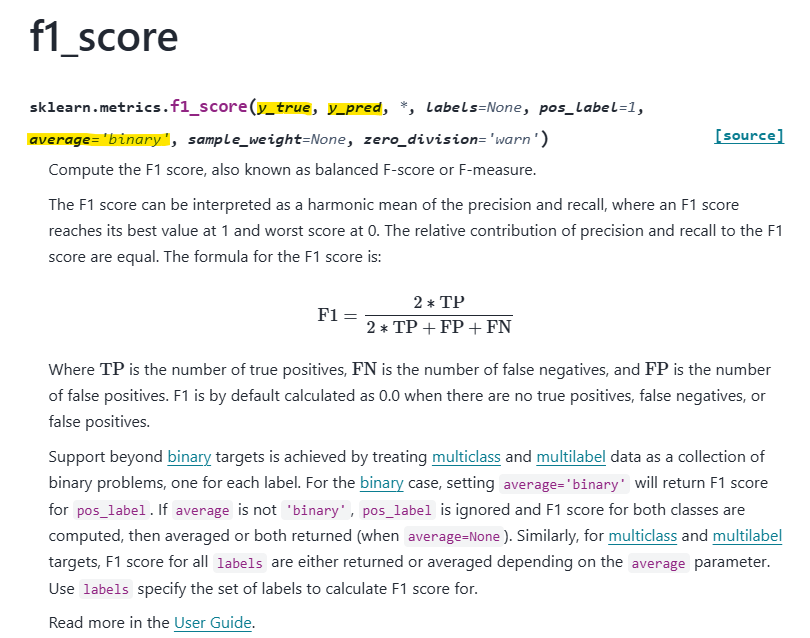

In [100]:
Image('./images/f1.png')

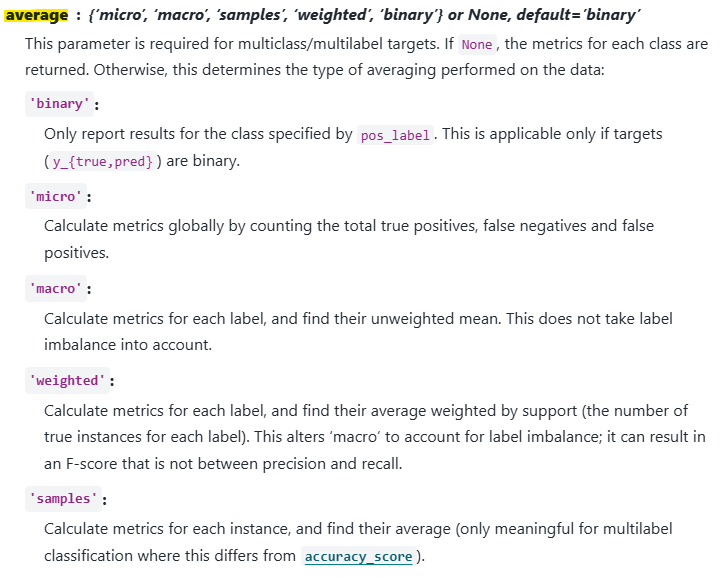

In [101]:
Image('./images/f1-2.png')

- `binary`: 이진 분류에서 특정 클래스(pos_label)에 대한 성능만 반환 (기본값)
- `micro`: 전체 데이터에서 TP, FP, FN을 한 번에 계산하여 F1-score 반환
- `macro`: 각 클래스별 F1-score를 계산한 후, 단순 평균을 반환 (클래스 불균형 고려 X)
- `weighted`: macro와 비슷하지만, 각 클래스별 Support(샘플 개수)를 가중치로 반영하여 평균 계산 (클래스 불균형 고려 O)
- `samples`: 다중 레이블 분류에서 샘플별 F1-score를 계산 후 평균 반환 (일반적인 분류에서는 사용되지 않음)

In [ ]:
micro_f1 = f1_score(y_true=true, y_pred=pred, average='micro')
macro_f1 = f1_score(y_true=true, y_pred=pred, average='macro')
weighted_f1 = f1_score(y_true=true, y_pred=pred, average='weighted')

# class 불균형이 심하지 않아 거의 유사한 값을 가짐
print(f"Micro F1: {micro_f1:.4f}",
      f"Macro F1: {macro_f1:.4f}",
      f"Weighted F1: {weighted_f1:.4f}",
      sep='\n')

Micro F1: 0.9111
Macro F1: 0.9135
Weighted F1: 0.9112


----

#### **Threshold (기준점) 설정**
- 분류 모델은 출력 값으로 특정 class에 속할 **확률 값**을 출력
- `predict_proba()`를 사용하면 각 샘플이 class=0 또는 class=1일 확률을 반환

In [113]:
model_prob = mlp.predict_proba(X_test)  # 각 class에 속할 확률을 도출
model_prob

array([[5.03638341e-57, 1.71488414e-28, 9.99999992e-01, ...,
        1.39736116e-25, 8.72556635e-25, 2.52945466e-27],
       [7.53131295e-19, 3.57157587e-01, 1.36925879e-07, ...,
        1.12917544e-14, 6.42661548e-01, 4.85880382e-08],
       [5.48377303e-69, 1.27122415e-28, 9.99999998e-01, ...,
        2.53029806e-33, 1.63230874e-25, 5.99930685e-30],
       ...,
       [2.30638582e-26, 3.80554991e-12, 2.99220337e-08, ...,
        1.03301568e-11, 3.53594182e-04, 1.73513002e-03],
       [6.58895245e-15, 1.12951615e-02, 5.76660969e-04, ...,
        2.67844836e-09, 6.99384561e-01, 9.99314275e-03],
       [2.95185846e-09, 7.18299807e-06, 3.12457743e-10, ...,
        3.63417956e-06, 6.65020057e-01, 3.28736985e-01]])

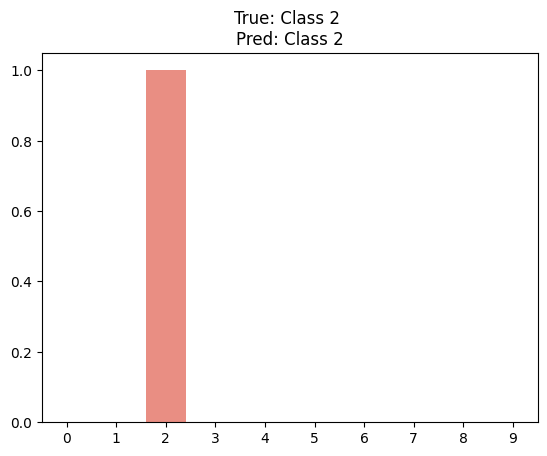

In [120]:
# 각 class 별 확률 예측분포 시각화
## 1st sample
sns.barplot(model_prob[0], color='salmon')
plt.title(f"True: Class {true[0]} \nPred: Class {pred[0]}")
plt.show()

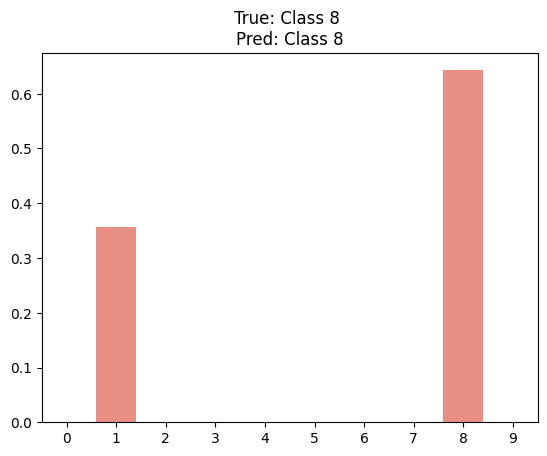

In [121]:
# 각 class 별 확률 예측분포 시각화
## 2nd sample
sns.barplot(model_prob[1], color='salmon')
plt.title(f"True: Class {true[1]} \nPred: Class {pred[1]}")
plt.show()

#### Insights from Pred. Distribution
- 첫 번째 sample은 높은 확률로 class 2로 예측 값 할당
- 두 번째 sample은 낮은 확률로 class 8에 예측 값 할당
- 이를 confidence라는 용어로 표현하기도 함! (confidence가 높은 샘플 vs. confidence가 낮은 샘플)